## Основные характеристики датасета

alcohol - алкоголь

malic_acid - яблочная кислота

ash - зола

alcalinity_of_ash - щелочность золы

magnesium - магний

total_phenols - общее количество фенолов

flavanoids - флавоноиды

nonflavanoid_phenols - нефлавоноидные фенолы

proanthocyanins- - проантоцианидины

color_intensity - интенсивность цвета

hue - оттенок

od280/od315_of_diluted_wines - OD280/OD315 разбавленных вин

proline - пролин

target - сорт винограда

# Подготовка

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


RANDOM_STATE=123

In [ ]:
wine = load_wine()
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Пропусков в датасете нет.

# Разделение на выборки

In [ ]:
X = data.iloc[:, :-1]
y = data.target

In [ ]:
y.value_counts()

target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

In [ ]:
y_train.value_counts()

target
1.0    50
0.0    41
2.0    33
Name: count, dtype: int64

# Обучение моделей

## Простое обучение

In [ ]:
basic_lg = LogisticRegression(max_iter=10000, random_state=RANDOM_STATE)
basic_lg.fit(X_train, y_train)
y_pred_basic_lg = basic_lg.predict(X_test)

accuracy_score(y_test, y_pred_basic_lg)

0.9629629629629629

In [ ]:
basic_svc = SVC(random_state=RANDOM_STATE)
basic_svc.fit(X_train, y_train)
y_pred_basic_svc = basic_svc.predict(X_test)

accuracy_score(y_test, y_pred_basic_svc)

0.7037037037037037

In [ ]:
basic_dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
basic_dtc.fit(X_train, y_train)
y_pred_basic_dtc = basic_dtc.predict(X_test)

accuracy_score(y_test, y_pred_basic_dtc)

0.8888888888888888

## С подбором параметров

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lg', LogisticRegression())
])

param_grid = {
    'lg__C': [0.01, 0.1, 1, 10, 100],
    'lg__max_iter': [10000],
    'lg__random_state': [RANDOM_STATE]
}
lg = GridSearchCV(pipe, param_grid, cv=5)
lg.fit(X_train, y_train)

print("Параметры:", lg.best_params_)
print("Точность:", lg.score(X_test, y_test))

Параметры: {'lg__C': 0.1, 'lg__max_iter': 10000, 'lg__random_state': 123}
Точность: 0.9814814814814815


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.001, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svc__random_state': [RANDOM_STATE]
}
svc = GridSearchCV(pipe, param_grid, cv=5)
svc.fit(X_train, y_train)

print("Параметры:", svc.best_params_)
print("Точность:", svc.score(X_test, y_test))

Параметры: {'svc__C': 0.1, 'svc__kernel': 'linear', 'svc__random_state': 123}
Точность: 0.9814814814814815


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier())
])

param_grid = {
    'dtc__min_samples_split': [2, 4, 8],
    'dtc__min_samples_leaf': [1, 2, 4],
    'dtc__criterion': ['gini', 'entropy', 'log_loss'],
    'dtc__random_state': [RANDOM_STATE]
}
dtc = GridSearchCV(pipe, param_grid, cv=5)
dtc.fit(X_train, y_train)

print("Параметры:", dtc.best_params_)
print("Точность:", dtc.score(X_test, y_test))

Параметры: {'dtc__criterion': 'entropy', 'dtc__min_samples_leaf': 4, 'dtc__min_samples_split': 2, 'dtc__random_state': 123}
Точность: 0.9444444444444444


# Оценка моделей

## Без подбора параметров

Accuracy

In [ ]:
print(accuracy_score(y_test, y_pred_basic_lg))
print(accuracy_score(y_test, y_pred_basic_svc))
print(accuracy_score(y_test, y_pred_basic_dtc))

0.9629629629629629
0.7037037037037037
0.8888888888888888


F-1 мера

In [ ]:
print(f1_score(y_test, y_pred_basic_lg, average='macro'))
print(f1_score(y_test, y_pred_basic_svc, average='macro'))
print(f1_score(y_test, y_pred_basic_dtc, average='macro'))

0.9656084656084656
0.6218509236053096
0.8934965290464012


Матрица ошибок

In [ ]:
print(confusion_matrix(y_test, y_pred_basic_lg))

[[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


In [ ]:
print(confusion_matrix(y_test, y_pred_basic_svc))


[[16  0  2]
 [ 1 20  0]
 [ 0 13  2]]


In [ ]:
print(confusion_matrix(y_test, y_pred_basic_dtc))

[[15  3  0]
 [ 1 20  0]
 [ 0  2 13]]


Без подбора параметров лучший результат показала модель логистической регрессии и намного хуже других себя показал себя метод опорных векторов. SVC модель часто путает 3 класс со 2.

## С подбором параметров

In [ ]:
y_pred_lg = lg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

Accuracy

In [ ]:
print(accuracy_score(y_test, y_pred_lg))
print(accuracy_score(y_test, y_pred_svc))
print(accuracy_score(y_test, y_pred_dtc))

0.9814814814814815
0.9814814814814815
0.9444444444444444


F-1 мера

In [ ]:
print(f1_score(y_test, y_pred_lg, average='macro'))
print(f1_score(y_test, y_pred_svc, average='macro'))
print(f1_score(y_test, y_pred_dtc, average='macro'))

0.9828609096901779
0.981117230527144
0.9466756817669597


Матрица ошибок

In [ ]:
print(confusion_matrix(y_test, y_pred_lg))

[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


In [ ]:
print(confusion_matrix(y_test, y_pred_svc))

[[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]


In [ ]:
print(confusion_matrix(y_test, y_pred_dtc))

[[16  2  0]
 [ 0 21  0]
 [ 0  1 14]]


Благодаря подпору параметров результаты всех моделей улучшились.

Для логистической регрессии изменение небольшое, но SVC модель смогла догнать её по качеству.

# Важность признаков в дереве решений

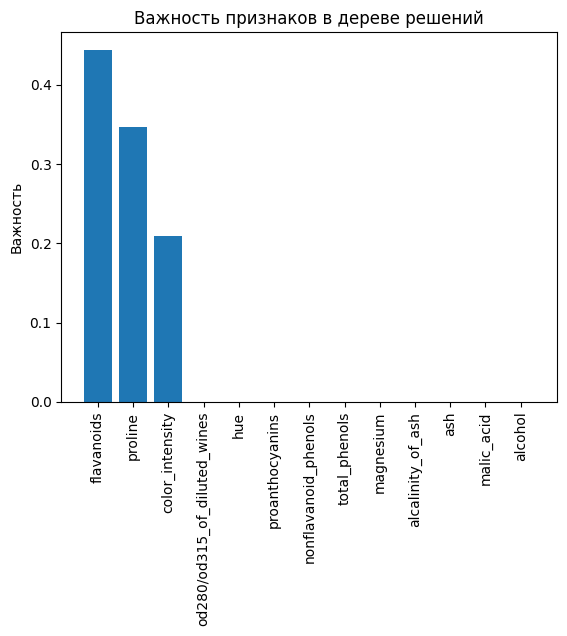

In [ ]:
feature_importances = dtc.best_estimator_.named_steps['dtc'].feature_importances_

feature_names = data.columns[:-1]

fig, ax = plt.subplots()
indices = np.argsort(feature_importances)[::-1]
ax.bar(range(X_train.shape[1]), feature_importances[indices])
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(feature_names[indices], rotation=90)
ax.set_title("Важность признаков в дереве решений")
ax.set_ylabel("Важность")

plt.show()

# Визуализация дерева

In [ ]:
!apt-get install graphviz -y
!pip install graphviz pydotplus

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

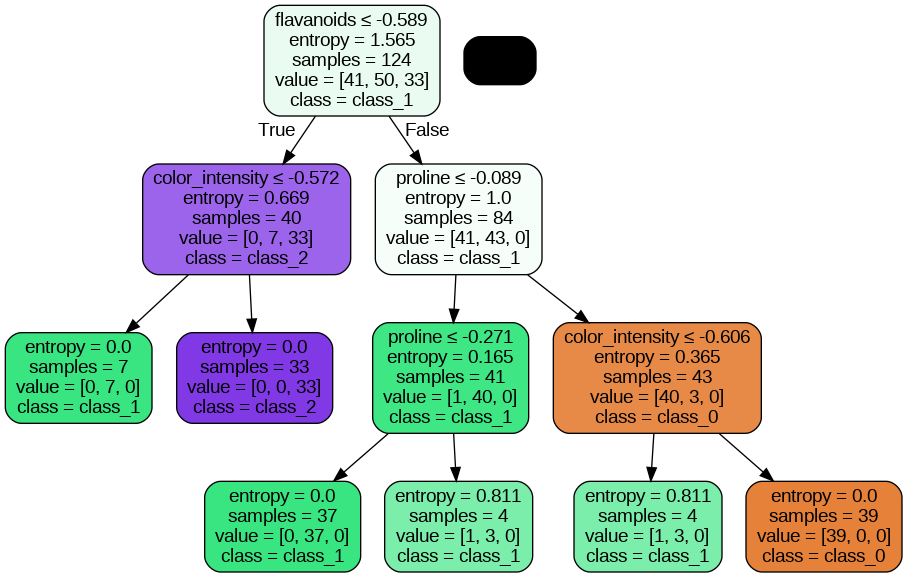

In [ ]:
dot_data = export_graphviz(dtc.best_estimator_.named_steps['dtc'], out_file=None,
                           feature_names=data.columns[:-1],
                           class_names=['class_0', 'class_1', 'class_2'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())